In [0]:
import random
random.seed(1)
!pip install -q git+https://github.com/tensorflow/docs
from sklearn.model_selection import train_test_split
import pandas as pd
import pydot
import keras
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pathlib
from sklearn import tree, preprocessing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
tf.random.set_seed(1)

In [0]:
from sklearn.datasets import load_wine

In [0]:
raw_data = load_wine()

In [0]:
def set_class(x):
  if x=='class_0':
    return 0
  elif x=='class_1':
    return 1
  else:
    return 2

In [0]:
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data['target']=raw_data['target']
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])
data['class']=data['class'].map(lambda x: set_class(x) )

In [0]:
data['class'].unique()

array([0, 1, 2])

In [0]:
data.shape

(178, 15)

In [0]:
from sklearn.model_selection import train_test_split
X = data.drop(['class'], axis=1).values
Y = data['class'].values
X_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

In [0]:
from keras.layers import Dense,Dropout, Flatten
def build_model_binary_cross_entropy():
  model = keras.Sequential()

  model.add(Dense(178, activation='relu',input_shape=(14,)))
  model.add(Dense(25, activation='relu'))
  # model.add(Dense(20, activation='relu'))
  # model.add(Dense(20, activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  # optimizer = tf.keras.optimizers.RMSprop(0.001)


  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['mae', 'mse','accuracy'])
  
  model.summary()

  model.fit(X_train, y_train, epochs=300)

  plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

  test_predictions = model.predict(X_test).flatten()

  a = plt.axes(aspect='equal')
  plt.scatter(Y_test, test_predictions)
  plt.xlabel('True Values [MPG]')
  plt.ylabel('Predictions [MPG]')
  lims = [0, 2]
  plt.xlim(lims)
  plt.ylim(lims)
  _ = plt.plot(lims, lims)

  return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 178)               2670      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                4475      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 7,171
Trainable params: 7,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
106/106 [==============================] - 0s 3ms/step - loss: 45.5845 - mae: 1.0000 - mse: 1.5849 - accuracy: 0.2925
Epoch 2/300
106/106 [==============================] - 0s 96us/step - loss: 4.0566 - mae: 0.6209 - mse: 0.6579 - accuracy: 0.4434
Epoch 3/300
106/106 [==============================] - 0s 84us/step - loss: 8.9048 - mae: 0.5849 - mse: 0.5849 - accuracy:

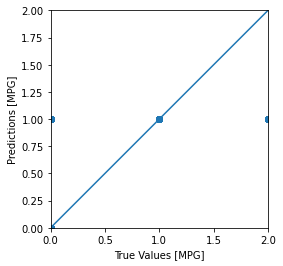

In [0]:
build_model_binary_cross_entropy()